In [0]:
from pyspark.sql.types import *
import pyspark.sql.functions as F
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
import pyspark.ml
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.classification import RandomForestClassifier
from pyspark.mllib.evaluation import BinaryClassificationMetrics
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import *
from pyspark.ml.feature import StandardScaler
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.types import DoubleType
import numpy as np
import pandas as pd
import seaborn as sns

# 1.1 Import the monthly and annual data and join

In [0]:
annual_features = spark.read.format('csv')\
.option('header', 'true')\
.option('inferSchema', 'true')\
.load('/FileStore/tables/annual_features.csv')\
.coalesce(5)
annual_features.cache()
annual_features.createOrReplaceTempView("annual_features_Table")

In [0]:
annual_day_of_week_counts_pivot = spark.read.format('csv')\
.option('header', 'true')\
.option('inferSchema', 'true')\
.load('/FileStore/tables/annual_day_of_week_counts_pivot.csv')\
.coalesce(5)
annual_day_of_week_counts_pivot.cache()
annual_day_of_week_counts_pivot.createOrReplaceTempView("annual_day_of_week_counts_pivot_Table")

In [0]:
mth_rolling_features = spark.read.format('csv')\
.option('header', 'true')\
.option('inferSchema', 'true')\
.load('/FileStore/tables/mth_rolling_features.csv')\
.coalesce(5)
mth_rolling_features.cache()
mth_rolling_features.createOrReplaceTempView("mth_rolling_features_Table")

In [0]:
mth_day_counts = spark.read.format('csv')\
.option('header', 'true')\
.option('inferSchema', 'true')\
.load('/FileStore/tables/mth_day_counts.csv')\
.coalesce(5)
mth_day_counts.cache()
mth_day_counts.createOrReplaceTempView("mth_day_counts_Table")

In [0]:
days_since_last_txn = spark.read.format('csv')\
.option('header', 'true')\
.option('inferSchema', 'true')\
.load('/FileStore/tables/days_since_last_txn.csv')\
.coalesce(5)
days_since_last_txn.cache()
days_since_last_txn.createOrReplaceTempView("days_since_last_txn_Table")

In [0]:
Retail_Data_Response = spark.read.format('csv')\
.option('header', 'true')\
.option('inferSchema', 'true')\
.load('/FileStore/tables/Retail_Data_Response.csv')\
.coalesce(5)
Retail_Data_Response.cache()
Retail_Data_Response.createOrReplaceTempView("Retail_Data_Response_Table")

In [0]:
annual_features_outputs = annual_features.join(annual_day_of_week_counts_pivot, 'customer_id', 'left_outer')
annual_features_outputs = Retail_Data_Response.join(annual_features_outputs, 'customer_id', 'left_outer').orderBy('customer_id')

In [0]:
annual_features_outputs.display()

customer_id response 2011_ann_txn_amt_sum 2011_ann_txn_amt_ave 2011_ann_txn_amt_std 2011_ann_txn_amt_var 2011_ann_txn_sem 2011_ann_txn_max 2011_ann_txn_min 2011_ann_txn_cnt 2012_ann_txn_amt_sum 2012_ann_txn_amt_ave 2012_ann_txn_amt_std 2012_ann_txn_amt_var 2012_ann_txn_sem 2012_ann_txn_max 2012_ann_txn_min 2012_ann_txn_cnt 2013_ann_txn_amt_sum 2013_ann_txn_amt_ave 2013_ann_txn_amt_std 2013_ann_txn_amt_var 2013_ann_txn_sem 2013_ann_txn_max 2013_ann_txn_min 2013_ann_txn_cnt 2014_ann_txn_amt_sum 2014_ann_txn_amt_ave 2014_ann_txn_amt_std 2014_ann_txn_amt_var 2014_ann_txn_sem 2014_ann_txn_max 2014_ann_txn_min 2014_ann_txn_cnt 2015_ann_txn_amt_sum 2015_ann_txn_amt_ave 2015_ann_txn_amt_std 2015_ann_txn_amt_var 2015_ann_txn_sem 2015_ann_txn_max 2015_ann_txn_min 2015_ann_txn_cnt cnt_2011_Friday cnt_2011_Monday cnt_2011_Saturday cnt_2011_Sunday cnt_2011_Thursday cnt_2011_Tuesday cnt_2011_Wednesday cnt_2012_Friday cnt_2012_Monday cnt_2012_Saturday cnt_2012_Sunday cnt_2012_Thursday cnt_2012_Tuesday cnt_2012_Wednesday cnt_2013_Friday cnt_2013_Monday cnt_2013_Saturday cnt_2013_Sunday cnt_2013_Thursday cnt_2013_Tuesday cnt_2013_Wednesday cnt_2014_Friday cnt_2014_Monday cnt_2014_Saturday cnt_2014_Sunday cnt_2014_Thursday cnt_2014_Tuesday cnt_2014_Wednesday cnt_2015_Friday cnt_2015_Monday cnt_2015_Saturday cnt_2015_Sunday cnt_2015_Thursday cnt_2015_Tuesday cnt_2015_Wednesday CS1112 0 212 70.66666666666667 22.03028218914441 485.33333333333337 12.719189352225943 96 56 3 337 67.4 12.720062892926277 161.8 5.688585061331157 81 52 5 212 70.66666666666667 34.50120770833006 1190.3333333333333 19.91928155777155 105 36 3 212 70.66666666666667 16.862186493255653 284.33333333333337 9.735387911006823 90 59 3 39 39.0 0.0 0.0 0.0 39 39 1 1 0 0 1 0 0 1 0 0 1 3 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 CS1113 0 244 81.33333333333333 21.07921567168317 444.33333333333337 12.170090842352456 94 57 3 374 74.8 17.035257556021865 290.20000000000005 7.618398781896364 95 51 5 426 85.2 13.0843417870369 171.2 5.851495535331117 97 65 5 226 56.5 27.958302285129307 781.6666666666666 13.979151142564653 97 36 4 220 73.33333333333333 27.300793639257694 745.3333333333334 15.762120556715853 98 44 3 1 1 0 1 0 0 0 2 1 0 0 0 1 1 0 1 1 0 0 2 1 0 0 1 0 0 3 0 0 2 0 0 0 0 1 CS1114 1 426 85.2 9.731392500562293 94.70000000000003 4.352011029397789 97 76 5 150 75.0 31.11269837220809 968.0 21.999999999999996 97 53 2 352 70.4 24.88573888796553 619.3 11.129240764760189 105 43 5 425 70.83333333333333 26.947479783212874 726.1666666666666 11.001262553806166 95 37 6 79 79.0 0.0 0.0 0.0 79 79 1 0 1 0 1 1 0 2 0 0 1 1 0 0 0 0 1 0 1 2 0 1 1 1 1 1 0 1 1 0 0 0 0 1 0 0 CS1115 1 261 87.0 15.0 225.0 8.660254037844387 102 72 3 473 67.57142857142857 21.846869667888676 477.2857142857143 8.257340580924813 104 41 7 557 79.57142857142857 10.533393610436333 110.95238095238098 3.9812485649673297 94 66 7 313 78.25 22.632940595512547 512.2499999999999 11.316470297756274 98 50 4 55 55.0 0.0 0.0 0.0 55 55 1 0 0 1 1 0 0 1 1 1 0 2 1 1 1 0 1 2 0 2 0 2 0 0 0 0 2 0 2 0 0 0 0 1 0 0 CS1116 1 235 58.75 21.203380233664003 449.5833333333333 10.601690116832001 87 41 4 230 76.66666666666667 30.138568866708543 908.3333333333334 17.400510848184254 105 45 3 59 59.0 0.0 0.0 0.0 59 59 1 333 66.6 25.234896472940004 636.8 11.285388783732706 96 40 5 0 0.0 0.0 0.0 0.0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 3 1 0 1 0 0 0 0 0 0 0 0 0 0 CS1117 0 213 71.0 26.057628441590765 679.0 15.044378795195678 98 46 3 196 65.33333333333333 32.715949219506584 1070.3333333333335 18.888562088676252 100 35 3 347 69.4 17.38677658451963 302.30000000000007 7.775602870517502 94 49 5 429 71.5 15.871357849913158 251.9 6.47945470956726 94 56 6 0 0.0 0.0 0.0 0.0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 1 0 2 0 3 0 0 0 0 0 1 1 1 2 1 0 0 0 0 0 0 0 CS1118 1 124 62.0 26.870057685088806 722.0 19.0 81 43 2 63 63.0 0.0 0.0 0.0 63 63 1 144 72.0 7.0710678118654755 50.0 5.0 77 67 2 620 68.88888888888889 23.5661008890124 555.3611111111111 7.855366963004133 101 41 9 60 6

In [0]:
Retail_Data_Response = Retail_Data_Response.withColumnRenamed('customer_id', 'CLNT_NO')

In [0]:
monthly_features_outputs = mth_rolling_features.join(mth_day_counts, on = ['CLNT_NO', 'ME_DT'], how = 'left_outer')
monthly_features_outputs = monthly_features_outputs.join(days_since_last_txn, on = ['CLNT_NO', 'ME_DT'], how = 'left_outer')
monthly_features_outputs = Retail_Data_Response.join(monthly_features_outputs, how = 'left_outer', on = ['CLNT_NO']).drop('_c0').orderBy(['CLNT_NO', 'ME_DT'])
monthly_features_outputs.display()

CLNT_NO response ME_DT mth_txn_amt_sum mth_txn_cnt mth_txn_amt_sum_sum_3M mth_txn_amt_sum_mean_3M mth_txn_amt_sum_max_3M mth_txn_cnt_sum_3M mth_txn_cnt_mean_3M mth_txn_cnt_max_3M mth_txn_amt_sum_sum_6M mth_txn_amt_sum_mean_6M mth_txn_amt_sum_max_6M mth_txn_cnt_sum_6M mth_txn_cnt_mean_6M mth_txn_cnt_max_6M mth_txn_amt_sum_sum_12M mth_txn_amt_sum_mean_12M mth_txn_amt_sum_max_12M mth_txn_cnt_sum_12M mth_txn_cnt_mean_12M mth_txn_cnt_max_12M cnt_Friday cnt_Monday cnt_Saturday cnt_Sunday cnt_Thursday cnt_Tuesday cnt_Wednesday days_since_last_txn CS1112 0 2011-05-31T00:00:00.000+0000 0 0 0 0.0 0 0 0.0 0 0 0.0 0 0 0.0 0 0 0.0 0 0 0.0 0 0 0 0 0 0 0 0 null CS1112 0 2011-06-30T00:00:00.000+0000 56 1 56 28.0 56 1 0.5 1 56 28.0 56 1 0.5 1 56 28.0 56 1 0.5 1 0 0 0 0 0 0 1 15 CS1112 0 2011-07-31T00:00:00.000+0000 0 0 56 18.666666666666668 56 1 0.3333333333333333 1 56 18.666666666666668 56 1 0.3333333333333333 1 56 18.666666666666668 56 1 0.3333333333333333 1 0 0 0 0 0 0 0 46 CS1112 0 2011-08-31T00:00:00.000+0000 96 1 152 50.666666666666664 96 2 0.6666666666666666 1 152 38.0 96 2 0.5 1 152 38.0 96 2 0.5 1 1 0 0 0 0 0 0 12 CS1112 0 2011-09-30T00:00:00.000+0000 0 0 96 32.0 96 1 0.3333333333333333 1 152 30.4 96 2 0.4 1 152 30.4 96 2 0.4 1 0 0 0 0 0 0 0 42 CS1112 0 2011-10-31T00:00:00.000+0000 60 1 156 52.0 96 2 0.6666666666666666 1 212 35.333333333333336 96 3 0.5 1 212 35.333333333333336 96 3 0.5 1 0 0 0 1 0 0 0 29 CS1112 0 2011-11-30T00:00:00.000+0000 0 0 60 20.0 60 1 0.3333333333333333 1 212 35.333333333333336 96 3 0.5 1 212 30.285714285714285 96 3 0.42857142857142855 1 0 0 0 0 0 0 0 59 CS1112 0 2011-12-31T00:00:00.000+0000 0 0 60 20.0 60 1 0.3333333333333333 1 156 26.0 96 2 0.3333333333333333 1 212 26.5 96 3 0.375 1 0 0 0 0 0 0 0 90 CS1112 0 2012-01-31T00:00:00.000+0000 0 0 0 0.0 0 0 0.0 0 156 26.0 96 2 0.3333333333333333 1 212 23.555555555555557 96 3 0.3333333333333333 1 0 0 0 0 0 0 0 121 CS1112 0 2012-02-29T00:00:00.000+0000 0 0 0 0.0 0 0 0.0 0 60 10.0 60 1 0.16666666666666666 1 212 21.2 96 3 0.3 1 0 0 0 0 0 0 0 150 CS1112 0 2012-03-31T00:00:00.000+0000 0 0 0 0.0 0 0 0.0 0 60 10.0 60 1 0.16666666666666666 1 212 19.272727272727273 96 3 0.2727272727272727 1 0 0 0 0 0 0 0 181 CS1112 0 2012-04-30T00:00:00.000+0000 56 1 56 18.666666666666668 56 1 0.3333333333333333 1 56 9.333333333333334 56 1 0.16666666666666666 1 268 22.333333333333332 96 4 0.3333333333333333 1 0 0 0 1 0 0 0 22 CS1112 0 2012-05-31T00:00:00.000+0000 0 0 56 18.666666666666668 56 1 0.3333333333333333 1 56 9.333333333333334 56 1 0.16666666666666666 1 268 22.333333333333332 96 4 0.3333333333333333 1 0 0 0 0 0 0 0 53 CS1112 0 2012-06-30T00:00:00.000+0000 52 1 108 36.0 56 2 0.6666666666666666 1 108 18.0 56 2 0.3333333333333333 1 264 22.0 96 4 0.3333333333333333 1 0 0 0 1 0 0 0 6 CS1112 0 2012-07-31T00:00:00.000+0000 81 1 133 44.333333333333336 81 2 0.6666666666666666 1 189 31.5 81 3 0.5 1 345 28.75 96 5 0.4166666666666667 1 0 0 0 0 0 1 0 28 CS1112 0 2012-08-31T00:00:00.000+0000 0 0 133 44.333333333333336 81 2 0.6666666666666666 1 189 31.5 81 3 0.5 1 249 20.75 81 4 0.3333333333333333 1 0 0 0 0 0 0 0 59 CS1112 0 2012-09-30T00:00:00.000+0000 72 1 153 51.0 81 2 0.6666666666666666 1 261 43.5 81 4 0.6666666666666666 1 321 26.75 81 5 0.4166666666666667 1 0 0 0 1 0 0 0 14 CS1112 0 2012-10-31T00:00:00.000+0000 0 0 72 24.0 72 1 0.3333333333333333 1 205 34.166666666666664 81 3 0.5 1 261 21.75 81 4 0.3333333333333333 1 0 0 0 0 0 0 0 45 CS1112 0 2012-11-30T00:00:00.000+0000 0 0 72 24.0 72 1 0.3333333333333333 1 205 34.166666666666664 81 3 0.5 1 261 21.75 81 4 0.3333333333333333 1 0 0 0 0 0 0 0 75 CS1112 0 2012-12-31T00:00:00.000+0000 76 1 76 25.333333333333332 76 1 0.3333333333333333 1 229 38.166666666666664 81 3 0.5 1 337 28.083333333333332 81 5 0.4166666666666667 1 0 0 1 0 0 0 0 16 CS1112 0 2013-01-31T00:00:00.000+0000 0 0 76 25.333333333333332 76 1 0.3333333333333333 1 148 24.666666666666668 76 2 0.3333333333333333 1 337 28.083333333333332 81 5 0.4166666666666667 1 0 0 0 0 0 0 0 47 CS1112 0 201

# 1.2 Steps for each method

## Annual - Logistic Regression

### 1.2.2

In [0]:
train_annual, test_annual = annual_features_outputs.randomSplit([1/3, 2/3], seed = 1147)
train_annual = train_annual.drop('customer_id')
test_annual = test_annual.drop('customer_id')

### 1.2.3

In [0]:
for i in train_annual.columns:
    train_annual = train_annual.withColumn(i, train_annual[i].cast(DoubleType()))
for i in test_annual.columns:
    test_annual = test_annual.withColumn(i, test_annual[i].cast(DoubleType()))

In [0]:
vecAssembler = VectorAssembler(inputCols = train_annual.drop('response').columns, outputCol="features")
vecAssemblerDF = vecAssembler.transform(train_annual)

vecAssembler1 = VectorAssembler(inputCols = test_annual.drop('response').columns, outputCol="features")
vecAssemblerDF1 = vecAssembler1.transform(test_annual)

In [0]:
standardScaler = StandardScaler(inputCol = "features", outputCol = "scaled_features", withMean=True)
vecAssemblerDF_scaled = standardScaler.fit(vecAssemblerDF).transform(vecAssemblerDF)
vecAssemblerDF1_scaled = standardScaler.fit(vecAssemblerDF).transform(vecAssemblerDF1)

### 1.2.4

In [0]:
lr = LogisticRegression(featuresCol = 'scaled_features', labelCol = 'response')
lrModel = lr.fit(vecAssemblerDF_scaled)

In [0]:
## I tried the following code for hyperparameter tuning but the running time is 1.8 hours, considering I need to re-run all code before submition I decided to
## keep the current model. Plus, after I used the best model selected from crossval, the model performance did not improve much, only a slight increse in AUC.


#paramGrid = ParamGridBuilder().addGrid(lrModel.regParam, [10, 20])\
#                              .build()

#crossval = CrossValidator(estimator=lr,
#                      estimatorParamMaps=paramGrid,
#                      evaluator=MulticlassClassificationEvaluator(label = 'response'),
#                      numFolds=2)

#cvModel = crossval.fit(vecAssemblerDF_scaled)

In [0]:
#coeff = cvModel.bestModel.coefficients
coeff = lrModel.coefficients

### 1.2.5

Out[315]: ([<matplotlib.axis.XTick at 0x7fe918b74520>,
 [Text(0, 0, '2011_ann_txn_amt_sum'),
  Text(1, 0, '2011_ann_txn_amt_ave'),
  Text(2, 0, '2011_ann_txn_amt_std'),
  Text(3, 0, '2011_ann_txn_amt_var'),
  Text(4, 0, '2011_ann_txn_sem'),
  Text(5, 0, '2011_ann_txn_max'),
  Text(6, 0, '2011_ann_txn_min'),
  Text(7, 0, '2011_ann_txn_cnt'),
  Text(8, 0, '2012_ann_txn_amt_sum'),
  Text(9, 0, '2012_ann_txn_amt_ave'),
  Text(10, 0, '2012_ann_txn_amt_std'),
  Text(11, 0, '2012_ann_txn_amt_var'),
  Text(12, 0, '2012_ann_txn_sem'),
  Text(13, 0, '2012_ann_txn_max'),
  Text(14, 0, '2012_ann_txn_min'),
  Text(15, 0, '2012_ann_txn_cnt'),
  Text(16, 0, '2013_ann_txn_amt_sum'),
  Text(17, 0, '2013_ann_txn_amt_ave'),
  Text(18, 0, '2013_ann_txn_amt_std'),
  Text(19, 0, '2013_ann_txn_amt_var'),
  Text(20, 0, '2013_ann_txn_sem'),
  Text(21, 0, '2013_ann_txn_max'),
  Text(22, 0, '2013_ann_txn_min'),
  Text(23, 0, '2013_ann_txn_cnt'),
  Text(24, 0, '2014_ann_txn_amt_sum'),
  Text(25, 0, '2014_ann_txn_

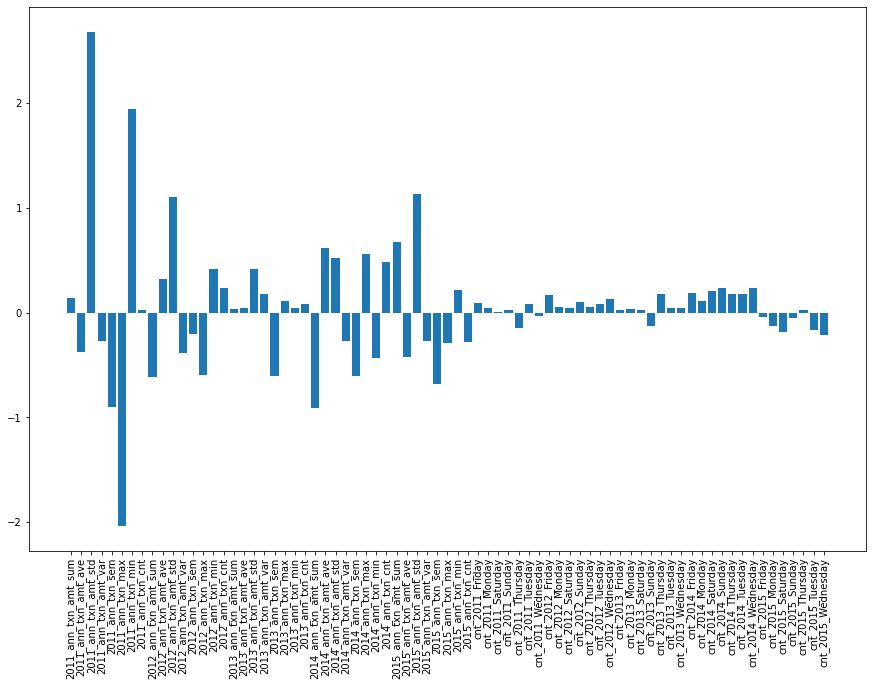

In [0]:
pd_train_annual = train_annual.toPandas().drop('response', axis = 1)
plt.figure(figsize = (15, 10))
plt.bar(range((pd_train_annual.shape[1])), coeff)
plt.xticks(range((pd_train_annual.shape[1])), pd_train_annual.columns, rotation=90)

### 1.2.6

In [0]:
predictions_test = cvModel.transform(vecAssemblerDF1_scaled)
pd_prediction_test = predictions_test.select('response', 'rawPrediction', 'probability', 'prediction').toPandas()

y_test_predicted = pd_prediction_test['prediction']
y_test_annual = np.array(test_annual.select('response').collect())

scores_test = []
for i in range(pd_prediction_test.shape[0]):
    scores_test.append(pd_prediction_test['probability'][i][1])

/databricks/spark/python/pyspark/sql/pandas/conversion.py:92: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unable to convert the field rawPrediction. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Direct cause: Unsupported type in conversion to Arrow: VectorUDT
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warnings.warn(msg)


Out[317]: Text(-2.575000000000003, 0.5, 'Counts of clients')

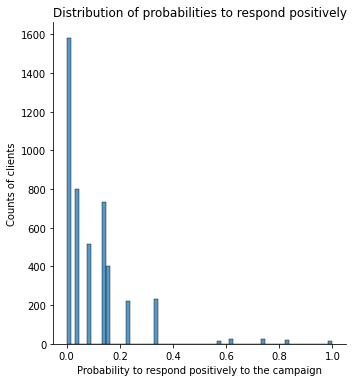

In [0]:
sns.displot(x = scores_test)
plt.title('Distribution of probabilities to respond positively')
plt.xlabel('Probability to respond positively to the campaign')
plt.ylabel('Counts of clients')

### 1.2.7

In [0]:
def cm_plot_train(y_true, y_predicted):
    
    cm = confusion_matrix(y_true, y_predicted)
    
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    classNames = ['Negative','Positive']
    plt.title('Negative or positive response Confusion Matrix - Train Data')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    thresh = cm.max() / 2.
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), fontsize = 20,
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.show()
    
    precision = cm[1, 1] / (cm[0, 1] + cm[1, 1])
    recall = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    return 'Training set precision: ', precision, 'Training set recall: ', recall

def cm_plot_test(y_true, y_predicted):
    
    cm = confusion_matrix(y_true, y_predicted)
    
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    classNames = ['Negative','Positive']
    plt.title('Negative or positive response Confusion Matrix - Test Data')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    thresh = cm.max() / 2.
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), fontsize = 20,
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.show()
    
    precision = cm[1, 1] / (cm[0, 1] + cm[1, 1])
    recall = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    return 'Test set precision: ', precision, 'Test set recall: ', recall

def auc_plot(y_train_annual, scores_train, y_test_annual, scores_test):
    # ROC Calc Train set
    fpr_train, tpr_train, _ = roc_curve(y_train_annual, scores_train)
    # ROC Calc Test set
    fpr_test, tpr_test, _ = roc_curve(y_test_annual, scores_test)
    # AUC Calc
    auc_train = auc(fpr_train, tpr_train)
    # AUC Calc
    auc_test  = auc(fpr_test, tpr_test)

    # Plotting
    plt.plot(fpr_train, tpr_train, label='Train set | AUC of {:4.3f}'.format(auc_train));
    plt.plot(fpr_test, tpr_test, label='Test set | AUC of {:4.3f}'.format(auc_test));
    plt.plot([0,1], [0,1], color = 'k', linestyle = '--', label = 'Random | AUC of 0.5');
    plt.ylim([0,1.0])
    plt.xlim([0,1.0])
    plt.title('Decision Tree ROC curves', fontsize = 18)
    plt.ylabel('True positive rate', fontsize = 18)
    plt.xlabel('False positive rate', fontsize = 18)
    plt.legend()
    plt.show()

In [0]:
predictions_train = lrModel.transform(vecAssemblerDF_scaled)
pd_prediction_train = predictions_train.select('response', 'rawPrediction', 'probability', 'prediction').toPandas()

y_train_predicted = pd_prediction_train['prediction']
y_train_annual = np.array(train_annual.select('response').collect()) 

scores_train = []
for i in range(pd_prediction_train.shape[0]):
    scores_train.append(pd_prediction_train['probability'][i][1])

/databricks/spark/python/pyspark/sql/pandas/conversion.py:92: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unable to convert the field rawPrediction. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Direct cause: Unsupported type in conversion to Arrow: VectorUDT
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warnings.warn(msg)


### train set confusion matrix, recall and precision

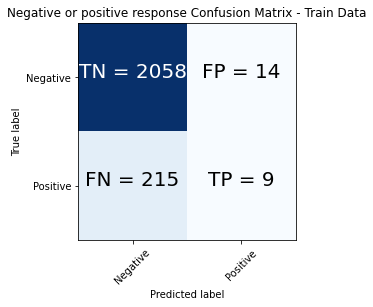

Out[320]: ('Training set precision: ',
 0.391304347826087,
 'Training set recall: ',
 0.04017857142857143)

In [0]:
cm_plot_train(y_train_annual, y_train_predicted)

### test set confusion matrix, recall and precision

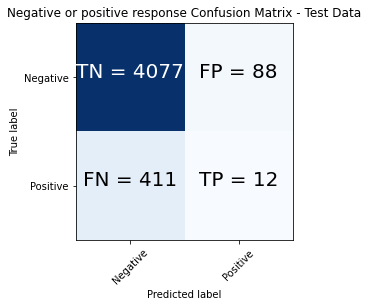

Out[321]: ('Test set precision: ', 0.12, 'Test set recall: ', 0.028368794326241134)

In [0]:
cm_plot_test(y_test_annual, y_test_predicted)

#### ROC curve for training and test set

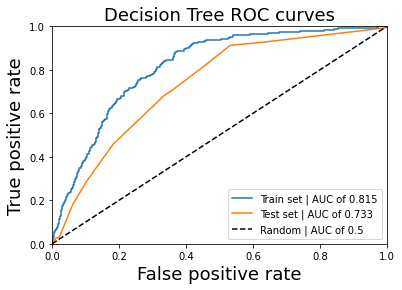

In [0]:
auc_plot(y_train_annual, scores_train, y_test_annual, scores_test)

## Annual - Decision Tree

### 1.2.4

In [0]:
dt = DecisionTreeClassifier(labelCol="response", featuresCol="scaled_features")
model = dt.fit(vecAssemblerDF_scaled)

In [0]:
#paramGrid = ParamGridBuilder().addGrid(model.maxDepth, [10, 20])\
#                              .build()

#crossval = CrossValidator(estimator=dt,
#                      estimatorParamMaps=paramGrid,
#                      evaluator=BinaryClassificationEvaluator(labelCol = 'response'),
#                      numFolds=2)

#cvModel = crossval.fit(vecAssemblerDF_scaled)

### 1.2.5

In [0]:
feature_importance_dt = []
for i in model.featureImportances:
    feature_importance_dt.append(i)

Out[326]: ([<matplotlib.axis.XTick at 0x7fe918d30d30>,
 [Text(0, 0, '2011_ann_txn_amt_sum'),
  Text(1, 0, '2011_ann_txn_amt_ave'),
  Text(2, 0, '2011_ann_txn_amt_std'),
  Text(3, 0, '2011_ann_txn_amt_var'),
  Text(4, 0, '2011_ann_txn_sem'),
  Text(5, 0, '2011_ann_txn_max'),
  Text(6, 0, '2011_ann_txn_min'),
  Text(7, 0, '2011_ann_txn_cnt'),
  Text(8, 0, '2012_ann_txn_amt_sum'),
  Text(9, 0, '2012_ann_txn_amt_ave'),
  Text(10, 0, '2012_ann_txn_amt_std'),
  Text(11, 0, '2012_ann_txn_amt_var'),
  Text(12, 0, '2012_ann_txn_sem'),
  Text(13, 0, '2012_ann_txn_max'),
  Text(14, 0, '2012_ann_txn_min'),
  Text(15, 0, '2012_ann_txn_cnt'),
  Text(16, 0, '2013_ann_txn_amt_sum'),
  Text(17, 0, '2013_ann_txn_amt_ave'),
  Text(18, 0, '2013_ann_txn_amt_std'),
  Text(19, 0, '2013_ann_txn_amt_var'),
  Text(20, 0, '2013_ann_txn_sem'),
  Text(21, 0, '2013_ann_txn_max'),
  Text(22, 0, '2013_ann_txn_min'),
  Text(23, 0, '2013_ann_txn_cnt'),
  Text(24, 0, '2014_ann_txn_amt_sum'),
  Text(25, 0, '2014_ann_txn_

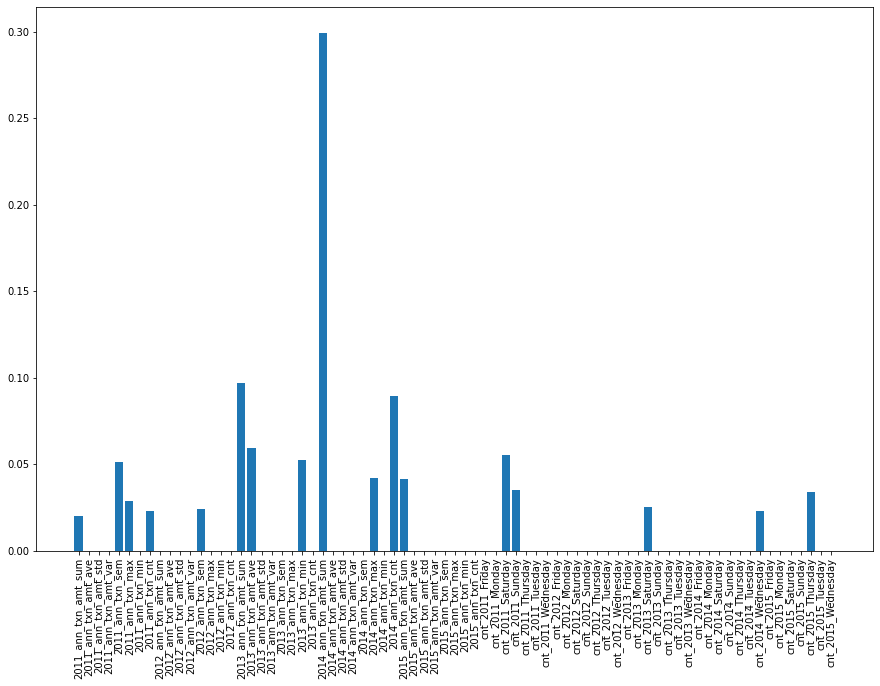

In [0]:
pd_train_annual = train_annual.toPandas().drop('response', axis = 1)
plt.figure(figsize = (15, 10))
plt.bar(range((pd_train_annual.shape[1])), feature_importance_dt)
plt.xticks(range((pd_train_annual.shape[1])), pd_train_annual.columns, rotation=90)

### 1.2.6

In [0]:
predictions_test = model.transform(vecAssemblerDF1_scaled)
pd_prediction_test = predictions_test.select('response', 'rawPrediction', 'probability', 'prediction').toPandas()

y_test_predicted = pd_prediction_test['prediction']
y_test_annual = np.array(test_annual.select('response').collect())

scores_test = []
for i in range(pd_prediction_test.shape[0]):
    scores_test.append(pd_prediction_test['probability'][i][1])

/databricks/spark/python/pyspark/sql/pandas/conversion.py:92: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unable to convert the field rawPrediction. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Direct cause: Unsupported type in conversion to Arrow: VectorUDT
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warnings.warn(msg)


Out[328]: Text(-2.575000000000003, 0.5, 'Counts of clients')

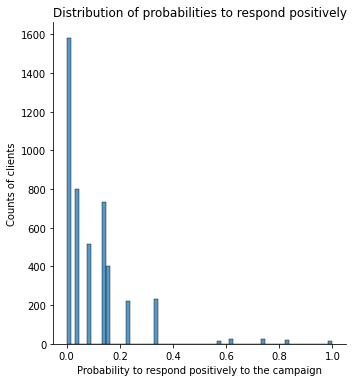

In [0]:
sns.displot(x = scores_test)
plt.title('Distribution of probabilities to respond positively')
plt.xlabel('Probability to respond positively to the campaign')
plt.ylabel('Counts of clients')

### 1.2.7

#### training set confusion matrix, recall and precision

In [0]:
predictions_train = model.transform(vecAssemblerDF_scaled)
pd_prediction_train = predictions_train.select('response', 'rawPrediction', 'probability', 'prediction').toPandas()

y_train_predicted = pd_prediction_train['prediction']
y_train_annual = np.array(train_annual.select('response').collect()) 

scores_train = []
for i in range(pd_prediction_train.shape[0]):
    scores_train.append(pd_prediction_train['probability'][i][1])

/databricks/spark/python/pyspark/sql/pandas/conversion.py:92: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unable to convert the field rawPrediction. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Direct cause: Unsupported type in conversion to Arrow: VectorUDT
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warnings.warn(msg)


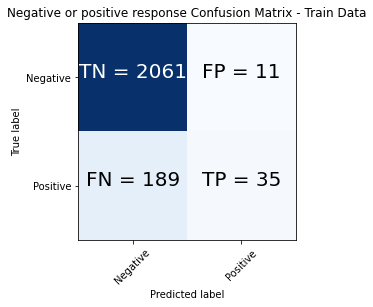

Out[330]: ('Training set precision: ',
 0.7608695652173914,
 'Training set recall: ',
 0.15625)

In [0]:
cm_plot_train(y_train_annual, y_train_predicted)

#### test set confusion matrix, recall and precision

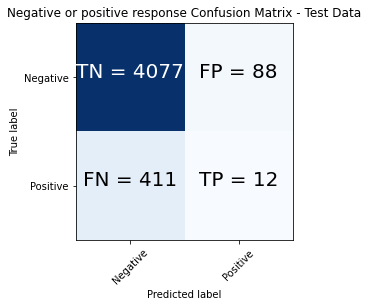

Out[331]: ('Test set precision: ', 0.12, 'Test set recall: ', 0.028368794326241134)

In [0]:
cm_plot_test(y_test_annual, y_test_predicted)

#### ROC curve for training and test set

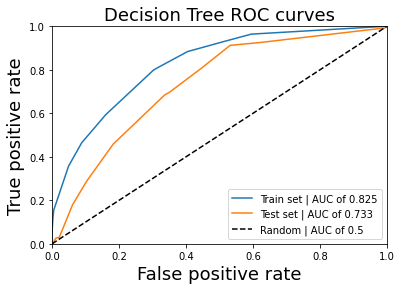

In [0]:
auc_plot(y_train_annual, scores_train, y_test_annual, scores_test)

## Annual - Random forest

### 1.2.4

In [0]:
rf = RandomForestClassifier(labelCol="response", featuresCol="scaled_features")
rfModel = rf.fit(vecAssemblerDF_scaled)

### 1.2.5

In [0]:
feature_importance_rf = []
for i in rfModel.featureImportances:
    feature_importance_rf.append(i)

In [0]:
len(feature_importance_rf)

Out[335]: 75

Out[336]: ([<matplotlib.axis.XTick at 0x7fe8e01f9730>,
 [Text(0, 0, '2011_ann_txn_amt_sum'),
  Text(1, 0, '2011_ann_txn_amt_ave'),
  Text(2, 0, '2011_ann_txn_amt_std'),
  Text(3, 0, '2011_ann_txn_amt_var'),
  Text(4, 0, '2011_ann_txn_sem'),
  Text(5, 0, '2011_ann_txn_max'),
  Text(6, 0, '2011_ann_txn_min'),
  Text(7, 0, '2011_ann_txn_cnt'),
  Text(8, 0, '2012_ann_txn_amt_sum'),
  Text(9, 0, '2012_ann_txn_amt_ave'),
  Text(10, 0, '2012_ann_txn_amt_std'),
  Text(11, 0, '2012_ann_txn_amt_var'),
  Text(12, 0, '2012_ann_txn_sem'),
  Text(13, 0, '2012_ann_txn_max'),
  Text(14, 0, '2012_ann_txn_min'),
  Text(15, 0, '2012_ann_txn_cnt'),
  Text(16, 0, '2013_ann_txn_amt_sum'),
  Text(17, 0, '2013_ann_txn_amt_ave'),
  Text(18, 0, '2013_ann_txn_amt_std'),
  Text(19, 0, '2013_ann_txn_amt_var'),
  Text(20, 0, '2013_ann_txn_sem'),
  Text(21, 0, '2013_ann_txn_max'),
  Text(22, 0, '2013_ann_txn_min'),
  Text(23, 0, '2013_ann_txn_cnt'),
  Text(24, 0, '2014_ann_txn_amt_sum'),
  Text(25, 0, '2014_ann_txn_

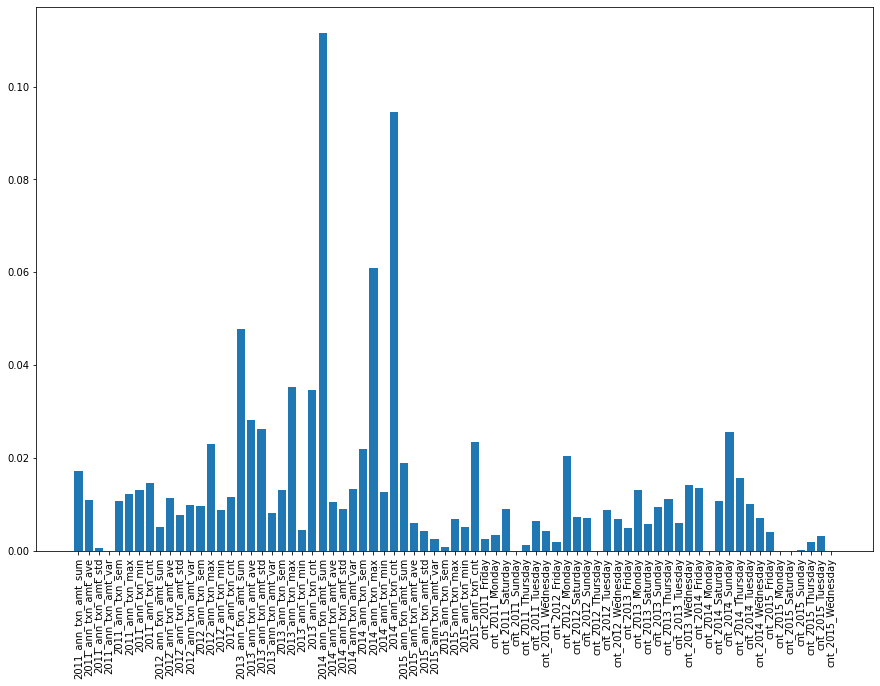

In [0]:
pd_train_annual = train_annual.toPandas().drop('response', axis = 1)
plt.figure(figsize = (15, 10))
plt.bar(range((pd_train_annual.shape[1])), feature_importance_rf)
plt.xticks(range((pd_train_annual.shape[1])), pd_train_annual.columns, rotation=90)

### 1.2.6

In [0]:
predictions_test = rfModel.transform(vecAssemblerDF1_scaled)
pd_prediction_test = predictions_test.select('response', 'rawPrediction', 'probability', 'prediction').toPandas()

y_test_predicted = pd_prediction_test['prediction']
y_test_annual = np.array(test_annual.select('response').collect())

scores_test = []
for i in range(pd_prediction_test.shape[0]):
    scores_test.append(pd_prediction_test['probability'][i][1])

/databricks/spark/python/pyspark/sql/pandas/conversion.py:92: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unable to convert the field rawPrediction. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Direct cause: Unsupported type in conversion to Arrow: VectorUDT
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warnings.warn(msg)


Out[339]: Text(3.799999999999997, 0.5, 'Counts of clients')

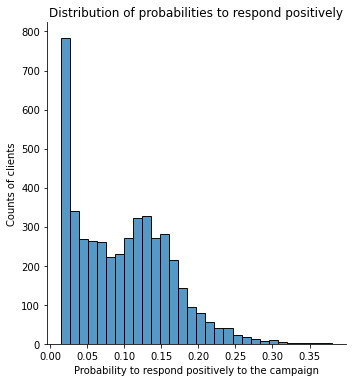

In [0]:
sns.displot(x = scores_test)
plt.title('Distribution of probabilities to respond positively')
plt.xlabel('Probability to respond positively to the campaign')
plt.ylabel('Counts of clients')

### 1.2.7

In [0]:
predictions_train = rfModel.transform(vecAssemblerDF_scaled)
pd_prediction_train = predictions_train.select('response', 'rawPrediction', 'probability', 'prediction').toPandas()

y_train_predicted = pd_prediction_train['prediction']
y_train_annual = np.array(train_annual.select('response').collect()) 

scores_train = []
for i in range(pd_prediction_train.shape[0]):
    scores_train.append(pd_prediction_train['probability'][i][1])

/databricks/spark/python/pyspark/sql/pandas/conversion.py:92: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unable to convert the field rawPrediction. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Direct cause: Unsupported type in conversion to Arrow: VectorUDT
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warnings.warn(msg)


#### training set confusion matrix, recall and precision

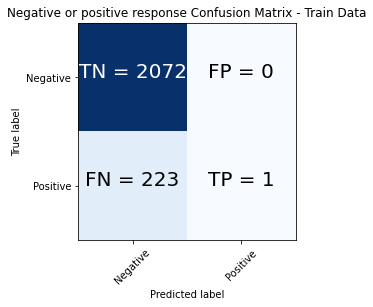

Out[341]: ('Training set precision: ',
 1.0,
 'Training set recall: ',
 0.004464285714285714)

In [0]:
cm_plot_train(y_train_annual, y_train_predicted)

#### test set confusion matrix, recall and precision

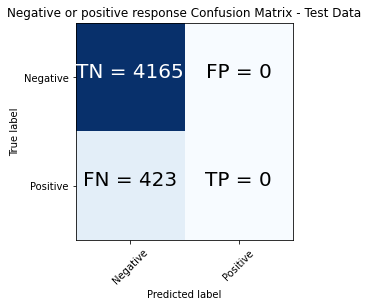

<command-3511649641930283>:51: RuntimeWarning: invalid value encountered in long_scalars
  precision = cm[1, 1] / (cm[0, 1] + cm[1, 1])
Out[342]: ('Test set precision: ', nan, 'Test set recall: ', 0.0)

In [0]:
cm_plot_test(y_test_annual, y_test_predicted)

#### ROC curve for training and test set

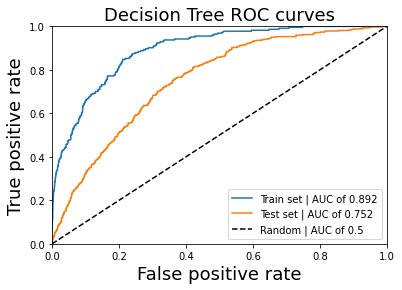

In [0]:
auc_plot(y_train_annual, scores_train, y_test_annual, scores_test)

## Monthly - Logistic Regression

### 1.2.2

In [0]:
train_monthly, test_monthly = monthly_features_outputs.randomSplit([1/3, 2/3], seed = 1147)
train_monthly = train_monthly.drop('CLNT_NO')
test_monthly = test_monthly.drop('CLNT_NO')

### 1.2.3

In [0]:
for i in train_monthly.columns:
    train_monthly = train_monthly.withColumn(i, train_monthly[i].cast(DoubleType()))
for i in test_monthly.columns:
    test_monthly = test_monthly.withColumn(i, test_monthly[i].cast(DoubleType()))

In [0]:
train_monthly = train_monthly.fillna(0)
test_monthly = test_monthly.fillna(0)

In [0]:
vecAssembler = VectorAssembler(inputCols = train_monthly.drop('response').columns, outputCol="features")
vecAssemblerDF = vecAssembler.transform(train_monthly)

vecAssembler1 = VectorAssembler(inputCols = test_monthly.drop('response').columns, outputCol="features")
vecAssemblerDF1 = vecAssembler1.transform(test_monthly)

In [0]:
standardScaler = StandardScaler(inputCol = "features", outputCol = "scaled_features", withMean=True)
vecAssemblerDF_scaled = standardScaler.fit(vecAssemblerDF).transform(vecAssemblerDF)
vecAssemblerDF1_scaled = standardScaler.fit(vecAssemblerDF).transform(vecAssemblerDF1)

### 1.2.4

In [0]:
lr = LogisticRegression(featuresCol = 'scaled_features', labelCol = 'response')
lrModel = lr.fit(vecAssemblerDF_scaled)

### 1.2.5

Out[350]: ([<matplotlib.axis.XTick at 0x7fe8df8009d0>,
 [Text(0, 0, 'ME_DT'),
  Text(1, 0, 'mth_txn_amt_sum'),
  Text(2, 0, 'mth_txn_cnt'),
  Text(3, 0, 'mth_txn_amt_sum_sum_3M'),
  Text(4, 0, 'mth_txn_amt_sum_mean_3M'),
  Text(5, 0, 'mth_txn_amt_sum_max_3M'),
  Text(6, 0, 'mth_txn_cnt_sum_3M'),
  Text(7, 0, 'mth_txn_cnt_mean_3M'),
  Text(8, 0, 'mth_txn_cnt_max_3M'),
  Text(9, 0, 'mth_txn_amt_sum_sum_6M'),
  Text(10, 0, 'mth_txn_amt_sum_mean_6M'),
  Text(11, 0, 'mth_txn_amt_sum_max_6M'),
  Text(12, 0, 'mth_txn_cnt_sum_6M'),
  Text(13, 0, 'mth_txn_cnt_mean_6M'),
  Text(14, 0, 'mth_txn_cnt_max_6M'),
  Text(15, 0, 'mth_txn_amt_sum_sum_12M'),
  Text(16, 0, 'mth_txn_amt_sum_mean_12M'),
  Text(17, 0, 'mth_txn_amt_sum_max_12M'),
  Text(18, 0, 'mth_txn_cnt_sum_12M'),
  Text(19, 0, 'mth_txn_cnt_mean_12M'),
  Text(20, 0, 'mth_txn_cnt_max_12M'),
  Text(21, 0, 'cnt_Friday'),
  Text(22, 0, 'cnt_Monday'),
  Text(23, 0, 'cnt_Saturday'),
  Text(24, 0, 'cnt_Sunday'),
  Text(25, 0, 'cnt_Thursday'),
  Te

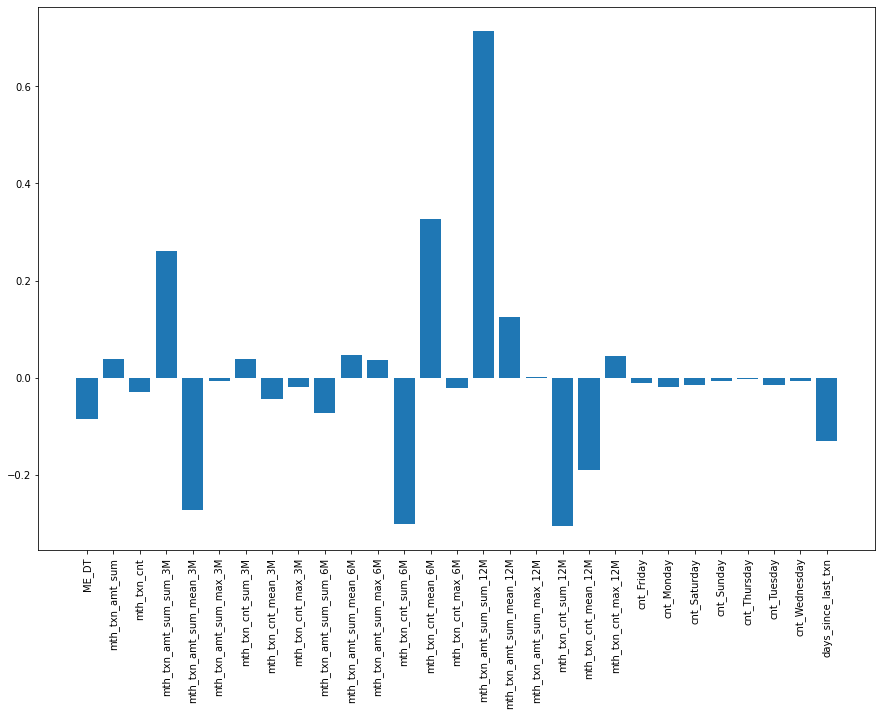

In [0]:
coeff1 = lrModel.coefficients
pd_train_monthly = train_monthly.toPandas().drop('response', axis = 1)
plt.figure(figsize = (15, 10))
plt.bar(range((pd_train_monthly.shape[1])), coeff1)
plt.xticks(range((pd_train_monthly.shape[1])), pd_train_monthly.columns, rotation=90)

### 1.2.6

In [0]:
predictions_test = lrModel.transform(vecAssemblerDF1_scaled)
pd_prediction_test = predictions_test.select('response', 'rawPrediction', 'probability', 'prediction').toPandas()

y_test_predicted = pd_prediction_test['prediction']
y_test_monthly = np.array(test_monthly.select('response').collect())

scores_test = []
for i in range(pd_prediction_test.shape[0]):
    scores_test.append(pd_prediction_test['probability'][i][1])

/databricks/spark/python/pyspark/sql/pandas/conversion.py:92: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unable to convert the field rawPrediction. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Direct cause: Unsupported type in conversion to Arrow: VectorUDT
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warnings.warn(msg)


Out[352]: Text(-8.825000000000003, 0.5, 'Counts of clients')

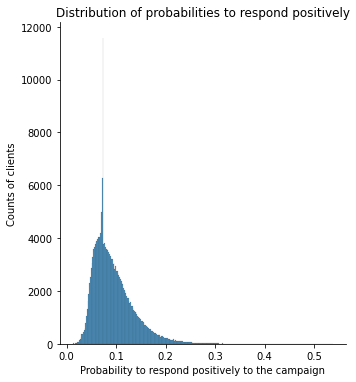

In [0]:
sns.displot(x = scores_test)
plt.title('Distribution of probabilities to respond positively')
plt.xlabel('Probability to respond positively to the campaign')
plt.ylabel('Counts of clients')

### 1.2.7

In [0]:
predictions_train = lrModel.transform(vecAssemblerDF_scaled)
pd_prediction_train = predictions_train.select('response', 'rawPrediction', 'probability', 'prediction').toPandas()

y_train_predicted = pd_prediction_train['prediction']
y_train_monthly = np.array(train_monthly.select('response').collect()) 

scores_train = []
for i in range(pd_prediction_train.shape[0]):
    scores_train.append(pd_prediction_train['probability'][i][1])

/databricks/spark/python/pyspark/sql/pandas/conversion.py:92: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unable to convert the field rawPrediction. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Direct cause: Unsupported type in conversion to Arrow: VectorUDT
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warnings.warn(msg)


### train set confusion matrix, recall and precision

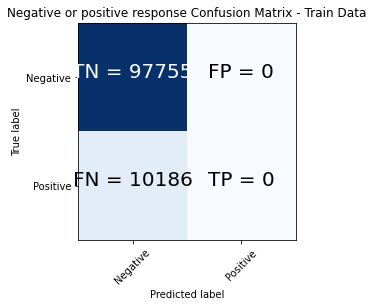

<command-3511649641930283>:24: RuntimeWarning: invalid value encountered in long_scalars
  precision = cm[1, 1] / (cm[0, 1] + cm[1, 1])
Out[354]: ('Training set precision: ', nan, 'Training set recall: ', 0.0)

In [0]:
cm_plot_train(y_train_monthly, y_train_predicted)

### test set confusion matrix, recall and precision

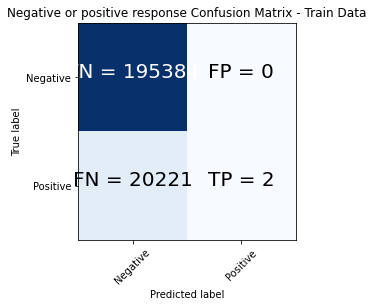

Out[355]: ('Training set precision: ',
 1.0,
 'Training set recall: ',
 9.88972951589774e-05)

In [0]:
cm_plot_test(y_test_monthly, y_test_predicted)

#### ROC curve for training and test set

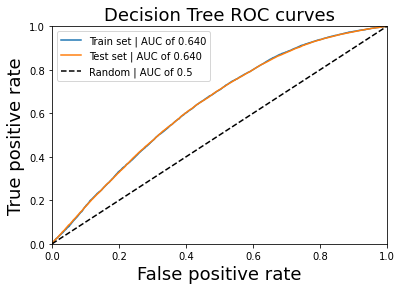

In [0]:
auc_plot(y_train_monthly, scores_train, y_test_monthly, scores_test)

### Monthly - Decision tree

### 1.2.4

In [0]:
dt1 = DecisionTreeClassifier(labelCol="response", featuresCol="scaled_features")
model1 = dt1.fit(vecAssemblerDF_scaled)

### 1.2.5

In [0]:
feature_importance_dt = []
for i in model1.featureImportances:
    feature_importance_dt.append(i)

Out[359]: ([<matplotlib.axis.XTick at 0x7fe918935d30>,
 [Text(0, 0, 'ME_DT'),
  Text(1, 0, 'mth_txn_amt_sum'),
  Text(2, 0, 'mth_txn_cnt'),
  Text(3, 0, 'mth_txn_amt_sum_sum_3M'),
  Text(4, 0, 'mth_txn_amt_sum_mean_3M'),
  Text(5, 0, 'mth_txn_amt_sum_max_3M'),
  Text(6, 0, 'mth_txn_cnt_sum_3M'),
  Text(7, 0, 'mth_txn_cnt_mean_3M'),
  Text(8, 0, 'mth_txn_cnt_max_3M'),
  Text(9, 0, 'mth_txn_amt_sum_sum_6M'),
  Text(10, 0, 'mth_txn_amt_sum_mean_6M'),
  Text(11, 0, 'mth_txn_amt_sum_max_6M'),
  Text(12, 0, 'mth_txn_cnt_sum_6M'),
  Text(13, 0, 'mth_txn_cnt_mean_6M'),
  Text(14, 0, 'mth_txn_cnt_max_6M'),
  Text(15, 0, 'mth_txn_amt_sum_sum_12M'),
  Text(16, 0, 'mth_txn_amt_sum_mean_12M'),
  Text(17, 0, 'mth_txn_amt_sum_max_12M'),
  Text(18, 0, 'mth_txn_cnt_sum_12M'),
  Text(19, 0, 'mth_txn_cnt_mean_12M'),
  Text(20, 0, 'mth_txn_cnt_max_12M'),
  Text(21, 0, 'cnt_Friday'),
  Text(22, 0, 'cnt_Monday'),
  Text(23, 0, 'cnt_Saturday'),
  Text(24, 0, 'cnt_Sunday'),
  Text(25, 0, 'cnt_Thursday'),
  Te

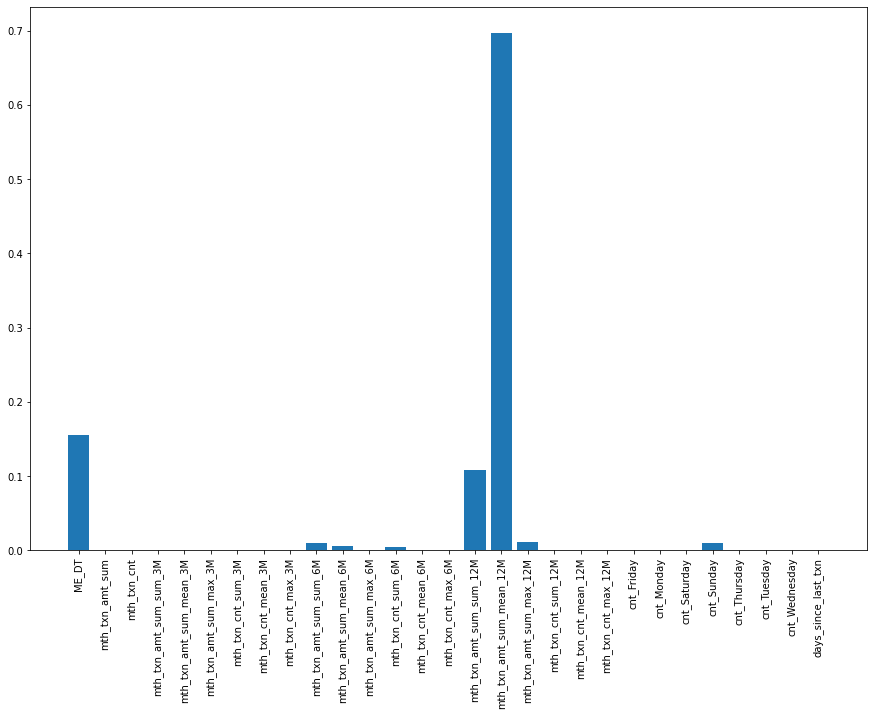

In [0]:
pd_train_annual = train_annual.toPandas().drop('response', axis = 1)
plt.figure(figsize = (15, 10))
plt.bar(range((pd_train_monthly.shape[1])), feature_importance_dt)
plt.xticks(range((pd_train_monthly.shape[1])), pd_train_monthly.columns, rotation=90)

### 1.2.6

In [0]:
predictions_test = model1.transform(vecAssemblerDF1_scaled)
pd_prediction_test = predictions_test.select('response', 'rawPrediction', 'probability', 'prediction').toPandas()

y_test_predicted = pd_prediction_test['prediction']
y_test_monthly = np.array(test_monthly.select('response').collect())

scores_test = []
for i in range(pd_prediction_test.shape[0]):
    scores_test.append(pd_prediction_test['probability'][i][1])

/databricks/spark/python/pyspark/sql/pandas/conversion.py:92: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unable to convert the field rawPrediction. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Direct cause: Unsupported type in conversion to Arrow: VectorUDT
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warnings.warn(msg)


Out[361]: Text(-15.075000000000003, 0.5, 'Counts of clients')

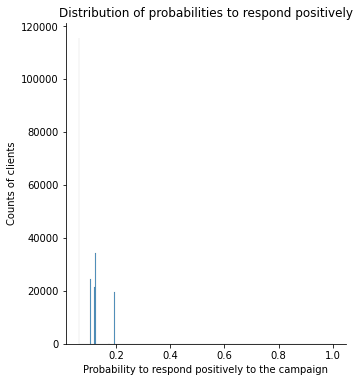

In [0]:
sns.displot(x = scores_test)
plt.title('Distribution of probabilities to respond positively')
plt.xlabel('Probability to respond positively to the campaign')
plt.ylabel('Counts of clients')

### 1.2.7

In [0]:
predictions_train = model1.transform(vecAssemblerDF_scaled)
pd_prediction_train = predictions_train.select('response', 'rawPrediction', 'probability', 'prediction').toPandas()

y_train_predicted = pd_prediction_train['prediction']
y_train_monthly = np.array(train_monthly.select('response').collect()) 

scores_train = []
for i in range(pd_prediction_train.shape[0]):
    scores_train.append(pd_prediction_train['probability'][i][1])

/databricks/spark/python/pyspark/sql/pandas/conversion.py:92: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unable to convert the field rawPrediction. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Direct cause: Unsupported type in conversion to Arrow: VectorUDT
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warnings.warn(msg)


### train set confusion matrix, recall and precision

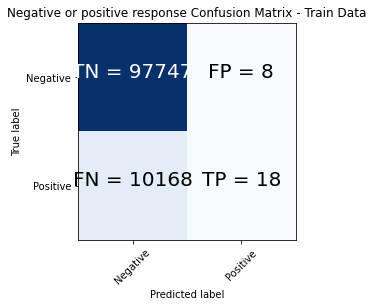

Out[363]: ('Training set precision: ',
 0.6923076923076923,
 'Training set recall: ',
 0.0017671313567641862)

In [0]:
cm_plot_train(y_train_monthly, y_train_predicted)

### test set confusion matrix, recall and precision

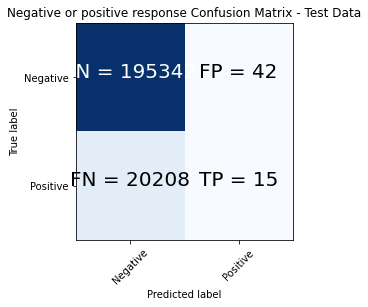

Out[364]: ('Test set precision: ',
 0.2631578947368421,
 'Test set recall: ',
 0.0007417297136923305)

In [0]:
cm_plot_test(y_test_monthly, y_test_predicted)

#### ROC curve for training and test set

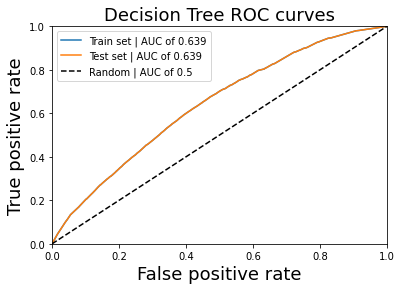

In [0]:
auc_plot(y_train_monthly, scores_train, y_test_monthly, scores_test)

## Monthly - Random forest

### 1.2.4

In [0]:
rf1 = RandomForestClassifier(labelCol="response", featuresCol="scaled_features")
rfModel1 = rf1.fit(vecAssemblerDF_scaled)

### 1.2.5

In [0]:
feature_importance_rf1 = []
for i in rfModel1.featureImportances:
    feature_importance_rf1.append(i)

Out[368]: ([<matplotlib.axis.XTick at 0x7fe8dcadfb50>,
 [Text(0, 0, 'ME_DT'),
  Text(1, 0, 'mth_txn_amt_sum'),
  Text(2, 0, 'mth_txn_cnt'),
  Text(3, 0, 'mth_txn_amt_sum_sum_3M'),
  Text(4, 0, 'mth_txn_amt_sum_mean_3M'),
  Text(5, 0, 'mth_txn_amt_sum_max_3M'),
  Text(6, 0, 'mth_txn_cnt_sum_3M'),
  Text(7, 0, 'mth_txn_cnt_mean_3M'),
  Text(8, 0, 'mth_txn_cnt_max_3M'),
  Text(9, 0, 'mth_txn_amt_sum_sum_6M'),
  Text(10, 0, 'mth_txn_amt_sum_mean_6M'),
  Text(11, 0, 'mth_txn_amt_sum_max_6M'),
  Text(12, 0, 'mth_txn_cnt_sum_6M'),
  Text(13, 0, 'mth_txn_cnt_mean_6M'),
  Text(14, 0, 'mth_txn_cnt_max_6M'),
  Text(15, 0, 'mth_txn_amt_sum_sum_12M'),
  Text(16, 0, 'mth_txn_amt_sum_mean_12M'),
  Text(17, 0, 'mth_txn_amt_sum_max_12M'),
  Text(18, 0, 'mth_txn_cnt_sum_12M'),
  Text(19, 0, 'mth_txn_cnt_mean_12M'),
  Text(20, 0, 'mth_txn_cnt_max_12M'),
  Text(21, 0, 'cnt_Friday'),
  Text(22, 0, 'cnt_Monday'),
  Text(23, 0, 'cnt_Saturday'),
  Text(24, 0, 'cnt_Sunday'),
  Text(25, 0, 'cnt_Thursday'),
  Te

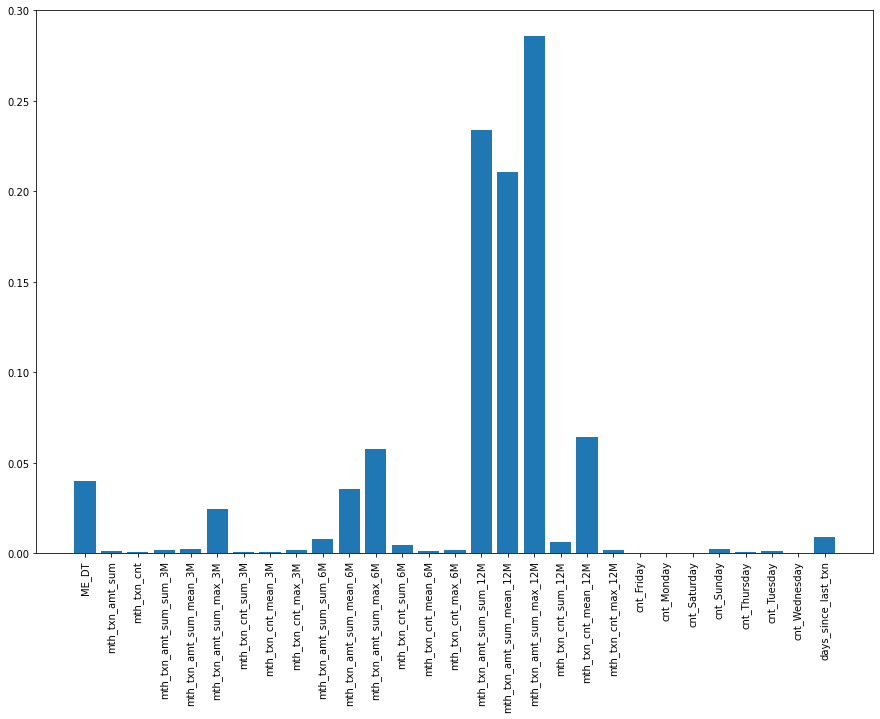

In [0]:
pd_train_monthly = train_monthly.toPandas().drop('response', axis = 1)
plt.figure(figsize = (15, 10))
plt.bar(range((pd_train_monthly.shape[1])), feature_importance_rf1)
plt.xticks(range((pd_train_monthly.shape[1])), pd_train_monthly.columns, rotation=90)

### 1.2.6

In [0]:
predictions_test = rfModel1.transform(vecAssemblerDF1_scaled)
pd_prediction_test = predictions_test.select('response', 'rawPrediction', 'probability', 'prediction').toPandas()

y_test_predicted = pd_prediction_test['prediction']
y_test_monthly = np.array(test_monthly.select('response').collect())

scores_test = []
for i in range(pd_prediction_test.shape[0]):
    scores_test.append(pd_prediction_test['probability'][i][1])

/databricks/spark/python/pyspark/sql/pandas/conversion.py:92: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unable to convert the field rawPrediction. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Direct cause: Unsupported type in conversion to Arrow: VectorUDT
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warnings.warn(msg)


Out[370]: Text(-8.825000000000003, 0.5, 'Counts of clients')

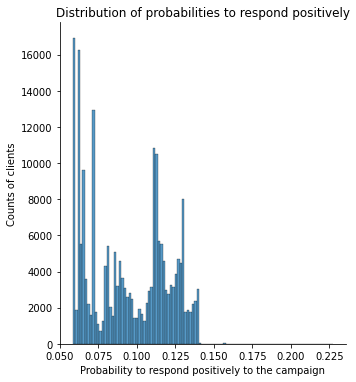

In [0]:
sns.displot(x = scores_test)
plt.title('Distribution of probabilities to respond positively')
plt.xlabel('Probability to respond positively to the campaign')
plt.ylabel('Counts of clients')

### 1.2.7

In [0]:
predictions_train = rfModel1.transform(vecAssemblerDF1_scaled)
pd_prediction_train = predictions_train.select('response', 'rawPrediction', 'probability', 'prediction').toPandas()

y_train_predicted = pd_prediction_train['prediction']
y_train_monthly = np.array(test_monthly.select('response').collect())

scores_train = []
for i in range(pd_prediction_train.shape[0]):
    scores_train.append(pd_prediction_train['probability'][i][1])

/databricks/spark/python/pyspark/sql/pandas/conversion.py:92: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unable to convert the field rawPrediction. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Direct cause: Unsupported type in conversion to Arrow: VectorUDT
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warnings.warn(msg)


#### training set confusion matrix, recall and precision

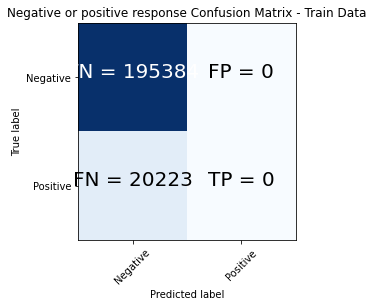

<command-3511649641930283>:24: RuntimeWarning: invalid value encountered in long_scalars
  precision = cm[1, 1] / (cm[0, 1] + cm[1, 1])
Out[372]: ('Training set precision: ', nan, 'Training set recall: ', 0.0)

In [0]:
cm_plot_train(y_train_monthly, y_train_predicted)

#### test set confusion matrix, recall and precision

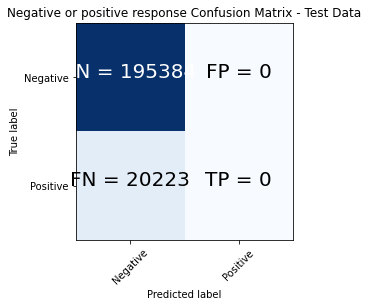

<command-3511649641930283>:51: RuntimeWarning: invalid value encountered in long_scalars
  precision = cm[1, 1] / (cm[0, 1] + cm[1, 1])
Out[373]: ('Test set precision: ', nan, 'Test set recall: ', 0.0)

In [0]:
cm_plot_test(y_test_monthly, y_test_predicted)

#### ROC curve for training and test set

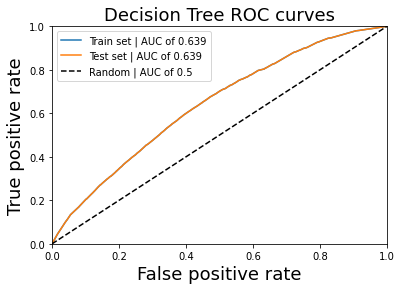

In [0]:
auc_plot(y_train_monthly, scores_train, y_test_monthly, scores_test)

## 1.3 Comparison of methods

| Model | Precision training| Precision test | Recall training | Recall test | AUC train set | AUC test set|
| ------------- | ------------- | ------------- | ------------- | ------------- | ------------- | ------------- |
| **Annual - Logistic Regression** | 0.391304347826087 | 0.12 | 0.04017857142857143 | 0.028368794326241134 | 0.815 | 0.733 |
| **Annual - Decision Tree** | 0.7608695652173914 | 0.12 | 0.15625 | 0.028368794326241134 | 0.825 | 0.733 |
| **Annual - Random Forest** | 1 | nan | 0.004464285714285714 | 0 | 0.892 | 0.752 |
| **Monthly - Logistic Regression** | nan | 1 | 0 | 9.88972951589774e-05 | 0.640 | 0.640 |
| **Monthly - Decision Tree** | 0.6923076923076923 | 0.2631578947368421 | 0.0017671313567641862 | 0.0007417297136923305 | 0.639 | 0.639 |
| **Monthly - Random Forest** | nan | nan | 0 | 0 | 0.639 | 0.639 |

#### I will choose annual features with logistic regression as the best model, from the pure data point of view, it has the second highest AUC for test set. Also, by looking at precisions and recalls the results of this model seems 'more eliable' than others, it is not as extreme as the others such asrandom forest predictions.

#### Notice that random forest has inaccurate precisions and recalls, so it might not be optimal to use random forest for this problem. Also, monthly feature, regardless of models, is not a good feature, it has lower AUC for both train and test data. And precisions, based on both logistic regression model and decision tree model, are 0, meaning they have low predictive power. Therefore, for this problem, it is optimal to use annual features with logistic regression model.